<a href="https://colab.research.google.com/github/AdithyaaVenkatesh/Oasis_intern/blob/main/Task_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**PROJECT 5 -  LEVEL 2**

---
# **Autocomplete and Autocorrect Data Analytics**



## 1) Data cleaning and preprocessing

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('/content/creditcard.csv')
print(df.head())



   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [36]:
df.isnull().sum()


,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [37]:
df.describe()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [44]:

num_duplicates = df.duplicated().sum()
print(f"Duplicate Data:\n{num_duplicates}")

Duplicate Data:
1081


In [45]:
df_cleaned = df.drop_duplicates()
df_duplicates = df_cleaned.duplicated().sum()
print(f"Duplicate Data (after removal):\n{df_duplicates}")

Duplicate Data (after removal):
0


## 2) NLP Preprocessing

In [46]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="mean")
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_imputed.drop(['Time', 'Class'], axis=1)),
                         columns=df.columns[1:-1])

df_scaled['Time'] = df_imputed['Time']
df_scaled['Class'] = df_imputed['Class']

print(df_scaled.head())



         V1        V2        V3        V4        V5        V6        V7  \
0 -0.694242 -0.044075  1.672773  0.973366 -0.245117  0.347068  0.193679   
1  0.608496  0.161176  0.109797  0.316523  0.043483 -0.061820 -0.063700   
2 -0.693500 -0.811578  1.169468  0.268231 -0.364572  1.351454  0.639776   
3 -0.493325 -0.112169  1.182516 -0.609727 -0.007469  0.936150  0.192071   
4 -0.591330  0.531541  1.021412  0.284655 -0.295015  0.071999  0.479302   

         V8        V9       V10  ...       V22       V23       V24       V25  \
0  0.082637  0.331128  0.083386  ...  0.382854 -0.176911  0.110507  0.246585   
1  0.071253 -0.232494 -0.153350  ... -0.880077  0.162201 -0.561131  0.320694   
2  0.207373 -1.378675  0.190700  ...  1.063358  1.456320 -1.138092 -0.628537   
3  0.316018 -1.262503 -0.050468  ...  0.007267 -0.304777 -1.941027  1.241904   
4 -0.226510  0.744326  0.691625  ...  1.100011 -0.220123  0.233250 -0.395202   

        V26       V27       V28    Amount  Time  Class  
0 -0.392170

## 3) Autocomplete

In [47]:
X = df_scaled.drop('Class', axis=1)
y = df_scaled['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     85307
         1.0       0.92      0.80      0.86       136

    accuracy                           1.00     85443
   macro avg       0.96      0.90      0.93     85443
weighted avg       1.00      1.00      1.00     85443



## 4) Autocorrect

         V1        V2        V3        V4        V5        V6        V7  \
0 -0.694242 -0.044075  1.672773  0.973366 -0.245117  0.347068  0.193679   
1  0.608496  0.161176  0.109797  0.316523  0.043483 -0.061820 -0.063700   
2 -0.693500 -0.811578  1.169468  0.268231 -0.364572  1.351454  0.639776   
3 -0.493325 -0.112169  1.182516 -0.609727 -0.007469  0.936150  0.192071   
4 -0.591330  0.531541  1.021412  0.284655 -0.295015  0.071999  0.479302   

         V8        V9       V10  ...       V23       V24       V25       V26  \
0  0.082637  0.331128  0.083386  ... -0.176911  0.110507  0.246585 -0.392170   
1  0.071253 -0.232494 -0.153350  ...  0.162201 -0.561131  0.320694  0.261069   
2  0.207373 -1.378675  0.190700  ...  1.456320 -1.138092 -0.628537 -0.288447   
3  0.316018 -1.262503 -0.050468  ... -0.304777 -1.941027  1.241904 -0.460217   
4 -0.226510  0.744326  0.691625  ... -0.220123  0.233250 -0.395202  1.041611   

        V27       V28    Amount  Time  Class  Anomaly  
0  0.330892 

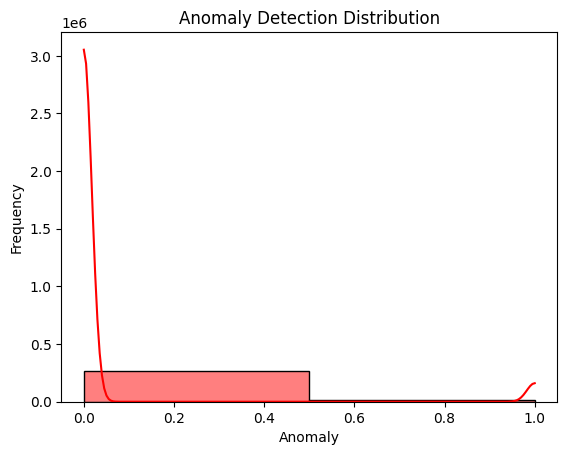

In [49]:
from sklearn.ensemble import IsolationForest
iso_forest = IsolationForest(contamination=0.05, random_state=42)
X_scaled = df_scaled.drop('Class', axis=1) # Define X_scaled to be the features of df_scaled
y_pred_anomalies = iso_forest.fit_predict(X_scaled)
df_scaled['Anomaly'] = y_pred_anomalies
df_scaled['Anomaly'] = df_scaled['Anomaly'].map({1: 0, -1: 1})

print(df_scaled.head())
sns.histplot(df_scaled['Anomaly'], bins=2, kde=True, color="red")
plt.title("Anomaly Detection Distribution")
plt.xlabel("Anomaly")
plt.ylabel("Frequency")
plt.show()

## 5) Metrics

In [50]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


Accuracy: 1.00
Precision: 0.92
Recall: 0.80
F1 Score: 0.86


## 6) User Experience

In [51]:
feedback = [1 if pred == true else 0 for pred, true in zip(y_pred, y_test)]
feedback_df = pd.DataFrame({'True': y_test, 'Predicted': y_pred, 'Feedback': feedback})

user_satisfaction = feedback_df['Feedback'].mean() * 100
print(f"User Satisfaction: {user_satisfaction:.2f}%")


User Satisfaction: 99.96%


## 7) Algorithm Comparison

In [54]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

# Initialize models
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel='linear', random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42)
}

# Evaluate models
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred_model = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred_model)
    print(f"{model_name} Accuracy: {accuracy:.2f}")


Random Forest Accuracy: 1.00
SVM Accuracy: 1.00
Logistic Regression Accuracy: 1.00


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## 8) Visualization

In [56]:
rf_model = models["Random Forest"]
feature_importances = rf_model.feature_importances_ # Access feature_importances_ from RandomForest
feature_names = X.columns

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

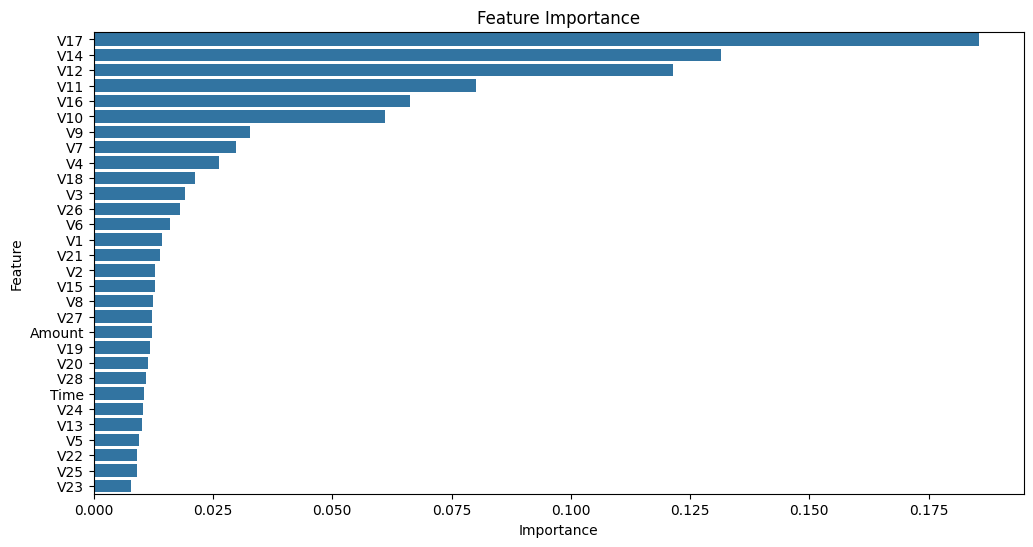

In [57]:
# Plotting feature importance
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title("Feature Importance")
plt.show()

<ipython-input-59-7495db58c710>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=accuracies, palette="viridis")


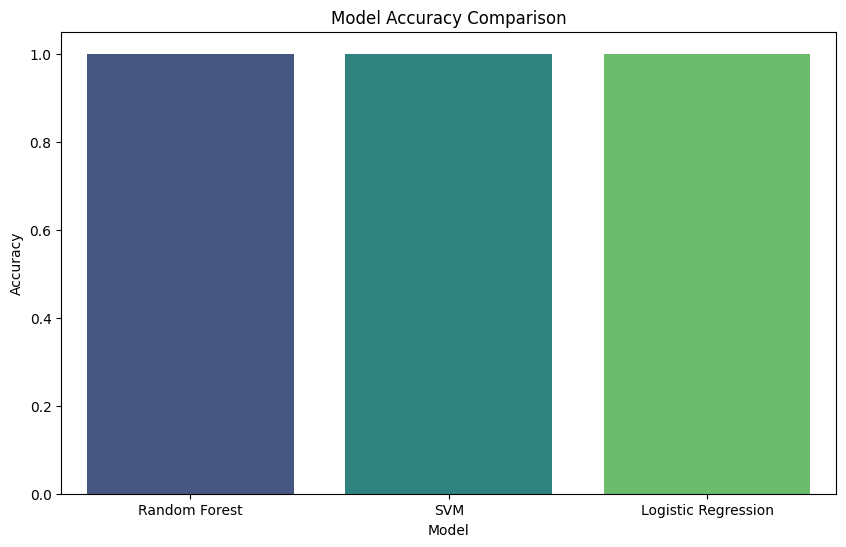

In [59]:
# Visualizing model comparisonm
model_names = list(models.keys()) # Corrected the variable name to model_names
accuracies = [accuracy_score(y_test, model.predict(X_test)) for model in models.values()]

plt.figure(figsize=(10, 6))
sns.barplot(x=model_names, y=accuracies, palette="viridis")
plt.title("Model Accuracy Comparison")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.show()